### First Observation
The data derived in the plots before seperating into northern and southern hemispheres has little to no visible trends. Once it is seperated, there is a clear inverse relationship between latitude and the other 3 variables being compared. This is because the northern hemisphere data approaches the north pole, and the southern hemisphere data approaches the south pole. 
### Second Observation
Next it is clear that a logistic regression could be used to more accuratly model the cloud percent as much of the data is either at y = 0 or y = 100. A polynomial fit for the windspeed would be more suitable as well as the data condenses at one side of the plot and is more spread out at the other. 
### Third Observation
Finally condititons are evidently better by the equator. This is evident due to the bell shaped appearance of the latitude versus temperature and the latitude versus humidity plots. Windspeed also goes down by the equator and picks up as we approach the poles. This can be enforced by the fact that many ideal condition cities were near the equator or on coastal regions as seen by the map. 

In [2]:
# main dependencies
import pandas as pd 
import numpy as np
from scipy.stats import linregress
import json
import requests
import matplotlib.pyplot as plt

# Project specific dependencies
from citipy import citipy
from api_info import weather_api_key

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
lat_lngs = []
cities = []
n = 1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=n)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=n)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



622

In [5]:
# Set up for requests and collecting data
# Include a try except to take out invalid requests. 
# This will be implemented throughout the rest of the project whenever making requests as well. 
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

city_names = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
max_temp = []
country = []
datetime = []

for city in cities:
    url = base_url + f'q={city}&units={units}&appid={weather_api_key}'
    city_weather_info = requests.get(url).json()
   
    try:
        city_names.append(city_weather_info['name'])
        longitude.append(city_weather_info['coord']['lon'])
        latitude.append(city_weather_info['coord']['lat'])
        temperature.append(city_weather_info['main']['temp'])
        humidity.append(city_weather_info['main']['humidity'])
        cloudiness.append(city_weather_info['clouds']['all'])
        wind_speed.append(city_weather_info['wind']['speed'])
        max_temp.append(city_weather_info['main']['temp_max'])
        country.append(city_weather_info['sys']['country'])
        datetime.append(city_weather_info['dt'])
    
    except:
        print('Not Valid City!')
    # print a log of data collection actions
    print(f'City Number: {cities.index(city)} | City Name: {city}')



City Number: 0 | City Name: fort nelson
City Number: 1 | City Name: lebu
City Number: 2 | City Name: hilo
City Number: 3 | City Name: bluff
Not Valid City!
City Number: 4 | City Name: sofiysk
City Number: 5 | City Name: petropavlovsk-kamchatskiy
City Number: 6 | City Name: vaini
City Number: 7 | City Name: busselton
City Number: 8 | City Name: rikitea
City Number: 9 | City Name: sinnamary
City Number: 10 | City Name: tezu
City Number: 11 | City Name: saint george
City Number: 12 | City Name: kondopoga
City Number: 13 | City Name: aykhal
City Number: 14 | City Name: snezhnogorsk
City Number: 15 | City Name: acapulco
Not Valid City!
City Number: 16 | City Name: illoqqortoormiut
City Number: 17 | City Name: arraial do cabo
City Number: 18 | City Name: havoysund
City Number: 19 | City Name: hithadhoo
City Number: 20 | City Name: pell city
City Number: 21 | City Name: leningradskiy
City Number: 22 | City Name: jamestown
City Number: 23 | City Name: deniliquin
City Number: 24 | City Name: ah

In [6]:
# Construct the Data Frame
df = pd.DataFrame({'City Name': city_names,'Longitude':longitude,
                  'Latitude': latitude,'Temperature':temperature,
                  'Humidity':humidity,'Cloud Percent':cloudiness,
                  'Wind Speed (mph)':wind_speed,'Max Temperature':max_temp,
                  'DateTime':datetime,'Country':country})

# Put all data into a csv                 
df.to_csv('Extracted_Data.csv')

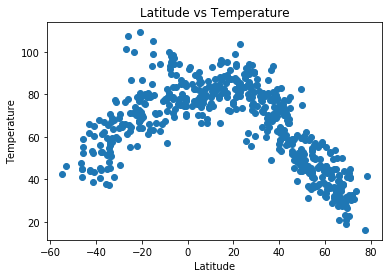

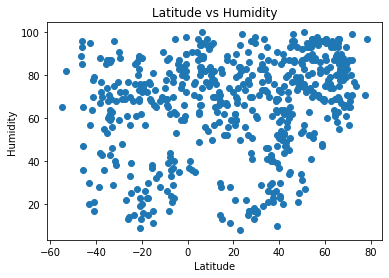

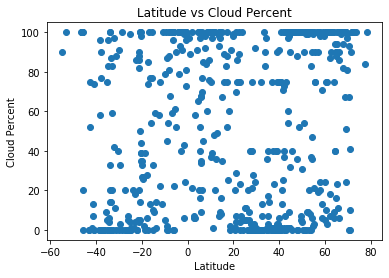

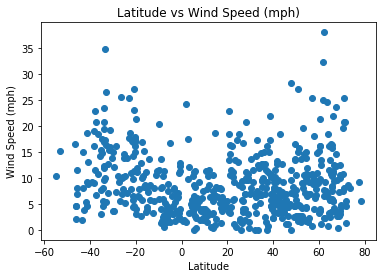

In [7]:
plot_cols = ['Temperature', 'Humidity','Cloud Percent','Wind Speed (mph)']
plot_titles = [f'Latitude vs {col}' for col in plot_cols]
#plt.show() resets figure, savefig before plt.show()

plt.scatter(df['Latitude'],df[plot_cols[0]])
plt.title(plot_titles[0]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[0])
plt.savefig('Pngs/'+plot_titles[0])
plt.show()
# Measuring corrleation between temperature and Latitude. The shape pf the 
# relationship seen is likely due to the poles of the earth and how the temperature 
# decreases the further south or north you get. 

plt.scatter(df['Latitude'],df[plot_cols[1]])
plt.title(plot_titles[1]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[1])
plt.savefig('Pngs/'+plot_titles[1])
plt.show()
# Measuring the relationship between Latitude and Humidity. The relationship that can be seen is 
# that of similair behavior to that of temperature. However it is less concises/less shaped
# meaning the same relationship exists but is not as strong as the previous. 

plt.scatter(df['Latitude'],df[plot_cols[2]])
plt.title(plot_titles[2]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[2])
plt.savefig('Pngs/'+plot_titles[2])
plt.show()
# Measuring the relationship between latitude and cloud percentage. The relationship seen here is 
# that many locations have either 0 or 100 percent cloudiness, however latitude does not play a huge 
# part in determining it as both sides of the x-axis have similair results. 

plt.scatter(df['Latitude'],df[plot_cols[3]])
plt.title(plot_titles[3]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[3])
plt.savefig('Pngs/'+plot_titles[3])
plt.show()
# Measuring the relationship between latitude and wind speed. What can be seen here is that 
# locations closer to the equator have less windspeed compared to locations at or approaching 
# either the north or south poles. 



In [9]:
# Create northern and southern Hemisphere data sets
north_hem = df[df['Latitude'] >= 0]
south_hem = df[df['Latitude'] <= 0]

# Initialize all empty arrays to append regression values 
slopes_south = []
y_intercepts_south = []
r_coef_south = []

slopes_north = []
y_intercepts_north = []
r_coef_north = []

for col_name in plot_cols:
    s_s,y_s,r_s,_,_ = linregress(south_hem['Latitude'],south_hem[col_name])
    s_n,y_n,r_n,_,_ = linregress(north_hem['Latitude'],north_hem[col_name])
    
    slopes_south.append(s_s)
    slopes_north.append(s_n)

    y_intercepts_south.append(y_s)
    y_intercepts_north.append(y_n)

    r_coef_south.append(r_s)
    r_coef_north.append(r_n)

y_vals_south = []
y_vals_north = []

# Construct all the lines needed for all 8 plots
for val in range(len(slopes_north)):
    x_vals_south = south_hem['Latitude']
    y_vals_south.append([slopes_south[val] * x + y_intercepts_south[val] for x in x_vals_south])

    x_vals_north = north_hem['Latitude']
    y_vals_north.append([slopes_north[val] * x + y_intercepts_north[val] for x in x_vals_north])


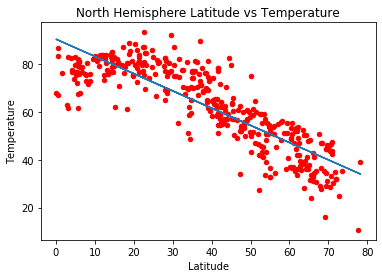

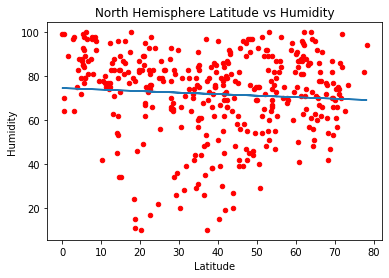

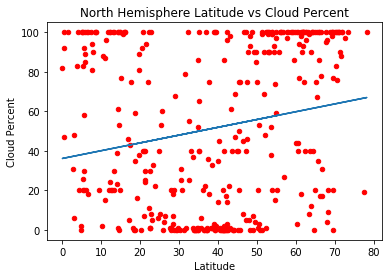

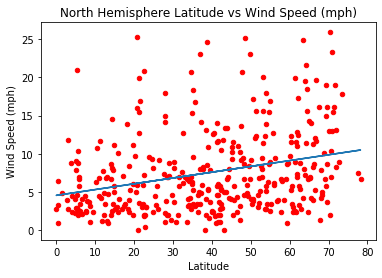

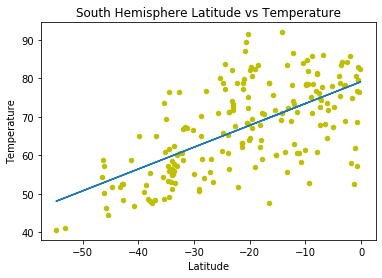

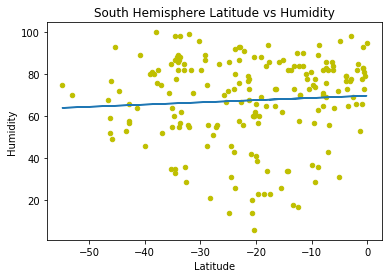

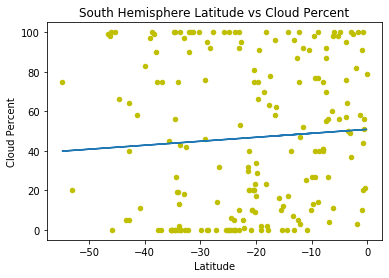

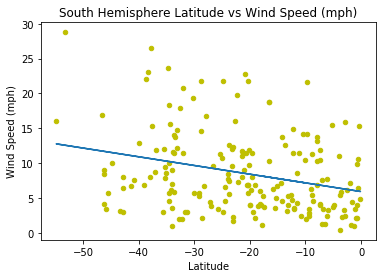

In [10]:
# Display all plots with regression lines with list comprehension

# North plots
l = [north_hem.plot(x = 'Latitude', y = col, kind = 'scatter',color = 'r', title = 'North Hemisphere Latitude vs ' + col) 
for col in plot_cols]
p = [p.plot(x_vals_north,y_vals_north[l.index(p)]) for p in l]

# South plots
l = [south_hem.plot(x = 'Latitude', y = col, kind = 'scatter', color = 'y', title = 'South Hemisphere Latitude vs ' + col) 
for col in plot_cols]
p = [p.plot(x_vals_south,y_vals_south[l.index(p)]) for p in l]


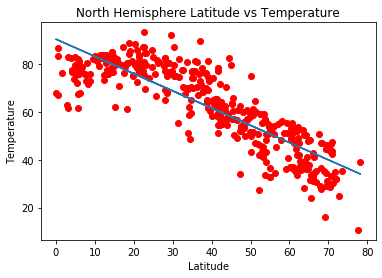

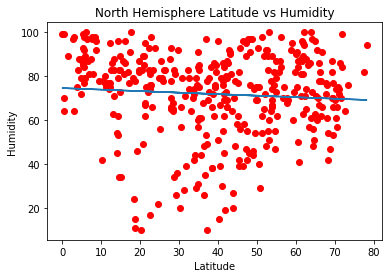

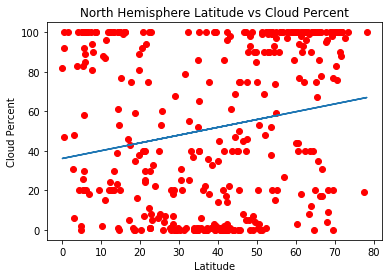

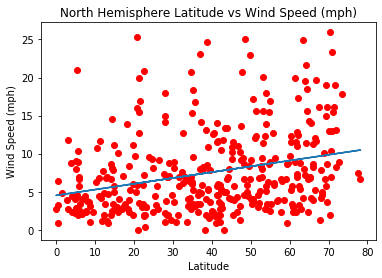

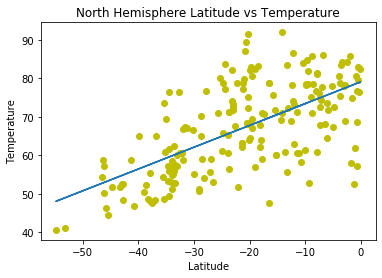

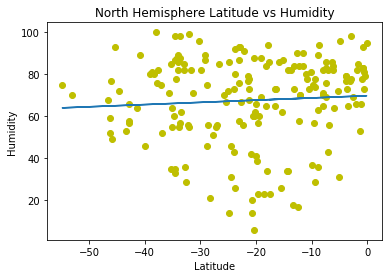

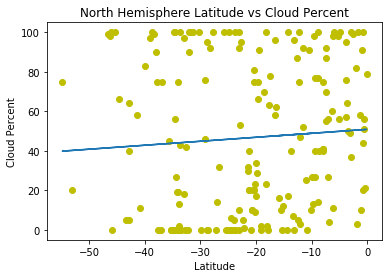

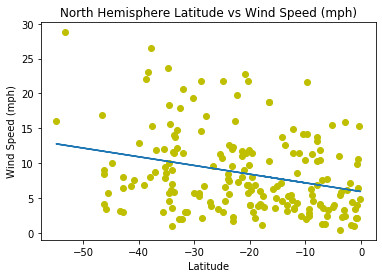

In [11]:
# Plt.save_fig not able to be implemented into list comprehension, so manually save all plots created

# Save North Regression Plots
plt.scatter(north_hem['Latitude'],north_hem[plot_cols[0]], color  = 'r')
plt.plot(x_vals_north,y_vals_north[0])
plt.title('North Hemisphere ' + plot_titles[0]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[0])
plt.savefig('Pngs/North 1')
plt.show()
# Evident downward trend as there is a strong relationship at hand. It is very clear that 
# as latitude increases, temperature decreases as we approach the north pole.

plt.scatter(north_hem['Latitude'],north_hem[plot_cols[1]],color  = 'r')
plt.plot(x_vals_north,y_vals_north[1])
plt.title('North Hemisphere ' + plot_titles[1]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[1])
plt.savefig('Pngs/North 2')
plt.show()
# Weak relationship as the line is very poorly fitted. There is slight decrease visible 
# as latitude increases.

plt.scatter(north_hem['Latitude'],north_hem[plot_cols[2]],color  = 'r')
plt.plot(x_vals_north,y_vals_north[2])
plt.title('North Hemisphere ' + plot_titles[2]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[2])
plt.savefig('Pngs/North 3')
plt.show()
# Weak relationship as the line is very poorly fitted. Logistic regression would model this better
# as the data is very polarized at 0 or 100 percent. 

plt.scatter(north_hem['Latitude'],north_hem[plot_cols[3]],color  = 'r')
plt.plot(x_vals_north,y_vals_north[3])
plt.title('North Hemisphere ' + plot_titles[3]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[3])
plt.savefig('Pngs/North 4')
plt.show()
# Weak relationship as the line is very poorly fitted. There is a slight increase visibe 
# as latitude increases

# Save South Regression Plots
plt.scatter(south_hem['Latitude'],south_hem[plot_cols[0]],color  = 'y')
plt.plot(x_vals_south,y_vals_south[0])
plt.title('North Hemisphere ' + plot_titles[0]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[0])
plt.savefig('Pngs/South 1')
plt.show()
# Evident upward trend as there is a strong relationship at hand. It is very clear that 
# as latitude increases, temperature increases as we approach the equator.

plt.scatter(south_hem['Latitude'],south_hem[plot_cols[1]],color  = 'y')
plt.plot(x_vals_south,y_vals_south[1])
plt.title('North Hemisphere ' + plot_titles[1]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[1])
plt.savefig('Pngs/South 2')
plt.show()
# Weak relationship as the line is very poorly fitted. There is slight increase visible 
# as latitude increases. However it is fairly constant as seen by the little slope of the line. 

plt.scatter(south_hem['Latitude'],south_hem[plot_cols[2]],color  = 'y')
plt.plot(x_vals_south,y_vals_south[2])
plt.title('North Hemisphere ' + plot_titles[2]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[2])
plt.savefig('Pngs/South 3')
plt.show()
# Weak relationship as the line is very poorly fitted. Logistic regression would model this better
# as the data is very polarized at 0 or 100 percent. The applies however it is slightly less polarized 
# than that of the data for the northern hemisphere. 

plt.scatter(south_hem['Latitude'],south_hem[plot_cols[3]],color  = 'y')
plt.plot(x_vals_south,y_vals_south[3])
plt.title('North Hemisphere ' + plot_titles[3]) 
plt.xlabel('Latitude')
plt.ylabel(plot_cols[3])
plt.savefig('Pngs/South 4')
plt.show()
# The points get slightly closer to each other as we approach 0 on the x axis. Despite this, it is still 
# a fairly poor fit as the line clearly intersects a small amount of points. 